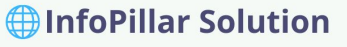<br><br><br><b>TASK 2} Color Detection & Invisibility Cloak
  ||  December 2021  ||  Computer Vision Intern</b>

<b>Author</b>: Aayushi Dighe

In [ ]:
import cv2
import numpy as np
import time
out_name = "output_shri.avi"
cap = cv2.VideoCapture(0)
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('shri.mp4' , fourcc, 20.0, (640,480))
time.sleep(2)
background = 0#capturing background
for i in range(30):
    ret, background = cap.read()#capturing image
while(cap.isOpened()):
    ret, img = cap.read()
    
    if not ret:
        break
        
    hsv=cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    lower_red = np.array([0,120,70])
    upper_red = np.array([10,255,255])
    mask1 = cv2.inRange(hsv , lower_red , upper_red)
    
    lower_red = np.array([170,120,70])
    upper_red = np.array([180,255,255])
    mask2 = cv2.inRange(hsv , lower_red , upper_red)
    
    mask1 = mask1 + mask2 #OR
    mask1=cv2.morphologyEx(mask1, cv2.MORPH_OPEN ,np.ones((3,3) , np.uint8) , iterations=2)
        
    mask2=cv2.morphologyEx(mask1, cv2.MORPH_DILATE ,np.ones((3,3) , np.uint8) , iterations=1)
        
    mask2 = cv2.bitwise_not(mask1)
    
    res1 = cv2.bitwise_and(background, background, mask=mask1)
    res2 = cv2.bitwise_and(img, img, mask=mask2)
    
    final_output = cv2.addWeighted(res1 , 1, res2 , 1, 0)
    
    cv2.imshow('Harry' , final_output)
    k=cv2.waitKey(10)
    if k==27:
        break
        
cap.release()
cv2.destroyAllWindows()

<br>

<br>